 Problem Statement: Credit risk Analysis for consumer finance company to decide the best possible way of reducing the loan  defaults and improve credit standing based on the existing loan data .
 The attributes in loan data needs to be identified that play key role in arriving at the conclusion whether to give loan or not.
 
 

As mentioned in the case study statement we have two analyse below risks.
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

DATA CLEANING

In [15]:
import pandas as pd 
import numpy as np

# This will read the loans file into a dataframe , i have kept the file local on my machine and it is being read 

def read_loan(path):
    df_loan = pd.read_csv(path) 
    print('Unique Loan Applications in loan csv file are ----------- '+ str(df_loan.id.nunique(dropna = True)))
    return df_loan

path_loan_csv = "C:\Lending Club\loan.csv"
df_loan = read_loan(path_loan_csv)

Unique Loan Applications in loan csv file are ----------- 39717


In [22]:
#lets perform the missing value standardization process on loan dataframe for columns 'emp_title' and ''

def standaridize_missing_data(path):
    df_loan = pd.read_csv(path)
    df_loan.to_csv('C:\Lending Club\loan.csv',na_rep='Unknown')
    return df_loan
    

df_loan_std0 = standaridize_missing_data(path_loan_csv)



C:\Users\Jaspreet.singh.MW-LT-087\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (50,79,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [25]:
#lets perform the %removal from interest column

def remove_percentage(path):
    df_loan = pd.read_csv(path)
    df_loan['int_rate'] = df_loan['int_rate'] .replace(to_replace='%', value='', regex=True)
    df_loan.to_csv('C:\Lending Club\loan.csv')
    return df_loan

df_loan_std1 = remove_percentage(path_loan_csv)


In [28]:
# removing the months and producing a number and renaming the column to terms_in_months

def standardize_term(path):
    df_loan = pd.read_csv(path)
    df_loan['term'] = df_loan['term'] .replace(to_replace='months', value='', regex=True)
    df_loan.rename(columns = {'term':'term_in_months'}, inplace = True)   
    df_loan.to_csv('C:\Lending Club\loan.csv')
    return df_loan

df_loan_std2 = standardize_term(path_loan_csv)

In [31]:
# changing the values to lowercase for better and consistent filtering and analysis

def standardize_case(path,column):
    df_loan = pd.read_csv(path)
    df_loan[column] = df_loan[column] .str.lower()
    df_loan.to_csv('C:\Lending Club\loan.csv')
    return df_loan

df_loan_std3 = standardize_case(path_loan_csv,'emp_title')
df_loan_std4 = standardize_case(path_loan_csv,'home_ownership')
df_loan_std5 = standardize_case(path_loan_csv,'verification_status')
df_loan_std6 = standardize_case(path_loan_csv,'loan_status')
df_loan_std7 = standardize_case(path_loan_csv,'purpose')
df_loan_std8 = standardize_case(path_loan_csv,'title')
df_loan_std9 = standardize_case(path_loan_csv,'loan_status')

C:\Users\Jaspreet.singh.MW-LT-087\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (56,85,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Jaspreet.singh.MW-LT-087\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (57,86,113,114) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Jaspreet.singh.MW-LT-087\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (58,87,114,115) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Jaspreet.singh.MW-LT-087\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (59,

DATA ANALYSIS

The first variable we are looking for is Owernship Type and finding the defaulters count / trend

In [43]:


def get_charged_off_loan_cases(df_loan_std9,default_type):
    filtered_df_loan_status = df_loan_std9.loc[df_loan_std9['loan_status'].isin(default_type)] 
    df_grp =  filtered_df_loan_status.groupby(["home_ownership"])["id"].count()
    df_srted = (df_grp.sort_values(ascending=False))
    top_defauters_by_ownership_type = df_srted.head(n=9).to_frame()
    return top_defauters_by_ownership_type
    

default_type=['charged off']
top_Defaulters_by_home_own = get_charged_off_loan_cases(df_loan_std9,default_type)
print(top_Defaulters_by_home_own)


                  id
home_ownership      
rent            2839
mortgage        2327
own              443
other             18


Plot for defaulters by ownership type -- 'rented' ones have highest default rates

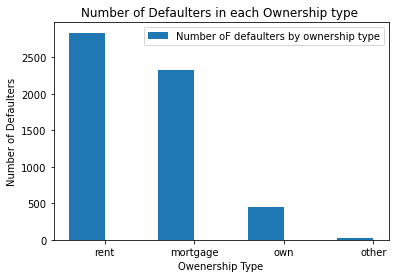

In [62]:
import numpy as np 
import matplotlib.pyplot as plt 


X = top_Defaulters_by_home_own['home_ownership']
Y = top_Defaulters_by_home_own['id']
X_axis = np.arange(len(X))


plt.bar(X_axis - 0.2, Y, 0.4, label = 'Number oF defaulters by ownership type')

plt.xticks(X_axis, X)
plt.xlabel("Owenership Type")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters in each Ownership type ")
plt.legend()
plt.show()

Finding the defaulters by verfication status of income -- The ones that are not verified are high

In [54]:

def get_charged_off_loan_cases_by_verification_status(df_loan_std9,default_type):
    filtered_df_loan_status = df_loan_std9.loc[df_loan_std9['loan_status'].isin(default_type)] 
    df_grp =  filtered_df_loan_status.groupby(["verification_status"])["id"].count()
    df_srted = (df_grp.sort_values(ascending=False))
    top_defauters_by_verification_status = df_srted.head(n=9).to_frame()
    return top_defauters_by_verification_status
    

default_type=['charged off']
top_defauters_by_verification_status = get_charged_off_loan_cases_by_verification_status(df_loan_std9,default_type)
print(top_defauters_by_verification_status)



                       id
verification_status      
not verified         2142
verified             2051
source verified      1434


Finding the defaulters by purpose -- the ones that are borrowing for debt consolidation are high

In [60]:
def get_charged_off_loan_cases_by_purpose(df_loan_std9,default_type):
    filtered_df_loan_status = df_loan_std9.loc[df_loan_std9['loan_status'].isin(default_type)] 
    df_grp =  filtered_df_loan_status.groupby(["purpose"])["id"].count()
    df_srted = (df_grp.sort_values(ascending=False))
    top_defauters_by_purpose = df_srted.head(n=9).to_frame()
    return top_defauters_by_purpose
    

default_type=['charged off']
top_defauters_by_purpose =  get_charged_off_loan_cases_by_purpose(df_loan_std9,default_type)
print(top_defauters_by_purpose)

                      id
purpose                 
debt_consolidation  2767
other                633
credit_card          542
small_business       475
home_improvement     347
major_purchase       222
car                  160
medical              106
wedding               96


In [63]:
def get_charged_off_loan_cases_by_title(df_loan_std9,default_type):
    filtered_df_loan_status = df_loan_std9.loc[df_loan_std9['loan_status'].isin(default_type)] 
    df_grp =  filtered_df_loan_status.groupby(["title"])["id"].count()
    df_srted = (df_grp.sort_values(ascending=False))
    top_defauters_by_title = df_srted.head(n=9).to_frame()
    return top_defauters_by_title
    

default_type=['charged off']
top_defauters_by_title =  get_charged_off_loan_cases_by_title(df_loan_std9,default_type)
print(top_defauters_by_title)

                          id
title                       
debt consolidation       475
debt consolidation loan  300
personal loan            145
personal                 104
small business loan      102
consolidation            100
home improvement          80
consolidation loan        55
loan                      45


By employment length the defaulters are high who have crossed 10 uyears

In [64]:
def get_charged_off_loan_cases_by_employment_length(df_loan_std9,default_type):
    filtered_df_loan_status = df_loan_std9.loc[df_loan_std9['loan_status'].isin(default_type)] 
    df_grp =  filtered_df_loan_status.groupby(["emp_length"])["id"].count()
    df_srted = (df_grp.sort_values(ascending=False))
    top_defauters_by_employment_length = df_srted.head(n=9).to_frame()
    return top_defauters_by_employment_length
    

default_type=['charged off']
top_defauters_by_employment_length =  get_charged_off_loan_cases_by_employment_length(df_loan_std9,default_type)
print(top_defauters_by_employment_length)

              id
emp_length      
10+ years   1331
< 1 year     639
2 years      567
3 years      555
4 years      462
5 years      458
1 year       456
6 years      307
7 years      263
